# Impoorting dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Data Collection 

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
163,164,Female,31,81,93
118,119,Female,51,67,43
50,51,Female,49,42,52
145,146,Male,28,77,97
172,173,Male,36,87,10
18,19,Male,52,23,29
185,186,Male,30,99,97


# Data Cleaning 

the data is in correct format therefore not much to do in this part

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


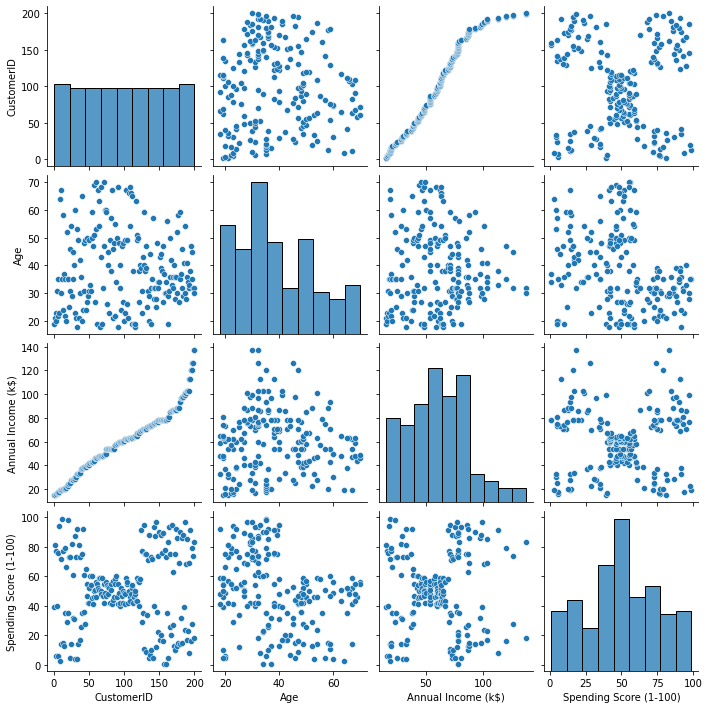

In [6]:
sns.pairplot(df)

# Feature Engineering

extracting most important feature

In [8]:
# We should drop the customer id column as it is not a good criteria to classify the customer 
# there would be no logical relationship between customer id and his spending but here we got some 
# kind of linear relationship which owuld have happend by random chance 
df2 = df.drop(columns="CustomerID")

In [9]:
df2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
# we have to also drop gender column as both man and woman are equally likely to spend more or less on a 
# particular type of product therefore it is not a good feature for our model 
df3 = df2.drop(columns='Gender')

In [11]:
df3.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [12]:
# now we have to also drop age column as we can conculde from the pairplot there is no relation between 
# any columns and age 
df4 = df3.drop(columns='Age')

In [13]:
df4.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Now the annual income and the spending score are the most important feature in our analysis and also for our model 

In [15]:
df4.shape

(200, 2)

# Model building 
# (Unsupervised Model - KMeansClustering)

In [26]:
train = df4.iloc[:195,:].values
test = df4.iloc[195:,:].values

In [27]:
train[0:4]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77]], dtype=int64)

In [28]:
train.shape

(195, 2)

In [29]:
test.shape

(5, 2)

In [30]:
# inorder to find the best no. of cluster 
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df4)
    wcss.append(km.inertia_) # inertia me sabka sabka wcss ota he

In [31]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 31248.853151807474,
 25387.556232492996,
 21838.86369282891,
 19740.01037035931]

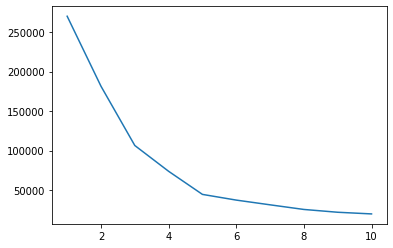

In [32]:
plt.plot(range(1,11),wcss)

now here we choose no. of cluster 5 as it is the most optimum one which we can conclude from th elbow curve

km = KMeans(n_clusters=5)
y_mean = km.fit_predict(train)

In [36]:
y_mean

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

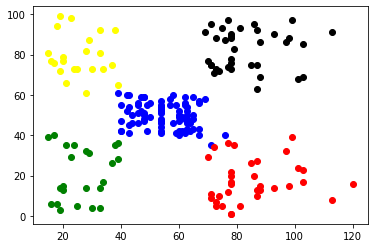

In [37]:
plt.scatter(train[y_mean==0,0],train[y_mean==0,1],color = 'blue')
plt.scatter(train[y_mean==1,0],train[y_mean==1,1],color = 'black')
plt.scatter(train[y_mean==2,0],train[y_mean==2,1],color = 'red')
plt.scatter(train[y_mean==3,0],train[y_mean==3,1],color = 'yellow')
plt.scatter(train[y_mean==4,0],train[y_mean==4,1],color = 'green')

In [40]:
y_pred = km.predict(test)

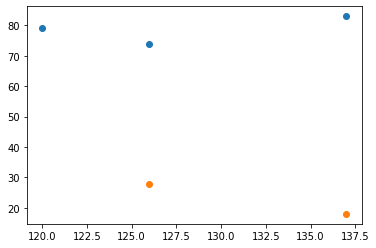

In [41]:
plt.scatter(test[y_pred==1,0],test[y_pred==1,1])
plt.scatter(test[y_pred==2,0],test[y_pred==2,1])

# from this graph we can understand that our model is predicting all the points correctly 